## Observations and Insights 

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
dataset_df = pd.merge(mouse_metadata, study_results, how = "outer", on ="Mouse ID")
dataset_df.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [90]:
# Checking the number of mice in the DataFrame.
mice_number = dataset_df["Mouse ID"].count()

In [91]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dataset_df[["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset_df = dataset_df.drop_duplicates(["Mouse ID"])
clean_dataset_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [93]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_dataset_df["Mouse ID"].count()
clean_mice_number

249

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [95]:
drug_regimen = dataset_df.groupby(["Drug Regimen"])

tumor_stats = pd.DataFrame({
    "Tumor Volume Mean":drug_regimen["Tumor Volume (mm3)"].mean(),
    "Tumor Volume Median":drug_regimen["Tumor Volume (mm3)"].median(),
    "Tumor Volume Var" : drug_regimen["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std Dev": drug_regimen["Tumor Volume (mm3)"].std(),
    "Tumor Volume SEM": drug_regimen["Tumor Volume (mm3)"].sem() 
    
})

tumor_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Var,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

Text(0, 0.5, 'Mice per time point')

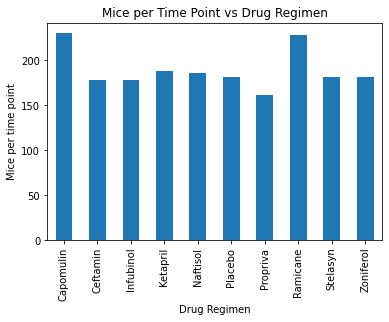

In [96]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pandas. 

bar_num =drug_regimen["Mouse ID"].count()
bp_data = bar_num.plot.bar(rot='vertical',title= "Mice per Time Point vs Drug Regimen")

bp_data.set_xlabel("Drug Regimen")
bp_data.set_ylabel("Mice per time point")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

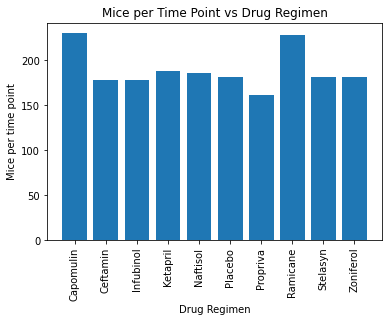

In [97]:
# Generate a bar plot showing the number of mice per time point for each treatment 
#throughout the course of the study using pyplot.
drug_list = bar_num.index.to_list()
plt.bar(drug_list, bar_num)
plt.title("Mice per Time Point vs Drug Regimen")
plt.ylabel("Mice per time point")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")

## Pie Plots

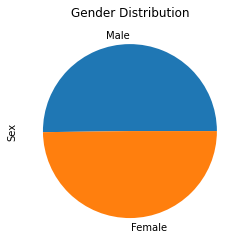

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_dataset_df["Sex"].value_counts()
pie_plot = mice_gender.plot.pie(y="Sex", title="Gender Distribution")


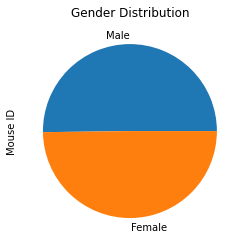

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_df = pd.DataFrame(mice_gender)
plt.pie (mice_gender,labels=mice_gender.index)
plt.title("Gender Distribution")
plt.ylabel("Mouse ID")
plt.show()

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment

#regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#Determined per the mean of tumor vol
promising_drugs = ['Capomulin','Ceftamin','Propriva','Ramicane']

mice_group_drugs = dataset_df.groupby(["Drug Regimen", "Mouse ID"])
mice_drug = mice_group_drugs.last()
top_drugs = [x for x in promising_drugs]
tumor_promising = [mice_drug["Tumor Volume (mm3)"][top_drugs]]
tumor_promising_df = pd.DataFrame(tumor_promising).transpose().reset_index()
tumor_promising_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [111]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.


tumor_volume = [tumor_promising_df.loc[tumor_promising_df["Drug Regimen"] == 
                                       promising_drugs[i], "Tumor Volume (mm3)"]for i in range (4)]

for i in range(4):
    quantiles = tumor_volume[i].quantile([.25,.5,.75])
    lower_quantile = quantiles[0.25]
    upper_quantile = quantiles[0.75]

    IQR = round(upper_quantile-lower_quantile,3)
    
    lower_bound = lower_quantile - (1.5*IQR)
    upper_bound = upper_quantile + (1.5*IQR)
    
    print(f"The IQR for {promising_drugs[i]} is {IQR} ")
    
    if(lower_bound < tumor_volume[i].min()) & (upper_bound > tumor_volume[i].max()):
        print(f" There are no outliers in {promising_drugs[i]}.")
    
    else:
        print(f" There is at least one outlier in {promising_drugs[i]}.")
    


The IQR for Capomulin is 7.782 
 There are no outliers in Capomulin.
The IQR for Ceftamin is 15.578 
 There are no outliers in Ceftamin.
The IQR for Propriva is 13.448 
 There are no outliers in Propriva.
The IQR for Ramicane is 9.099 
 There are no outliers in Ramicane.


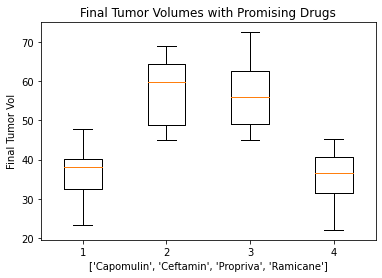

In [120]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
figl, axl = plt.subplots()
axl.set_title("Final Tumor Volumes with Promising Drugs")
axl.set_ylabel("Final Tumor Vol")
axl.set_xlabel(f"{promising_drugs}")
axl.boxplot(tumor_volume)
plt.show()


## Line and Scatter Plots

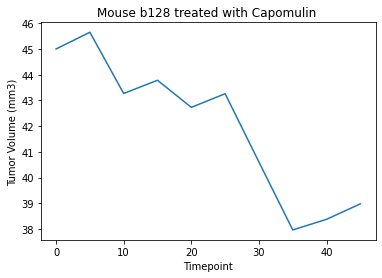

In [124]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_cap = dataset_df.loc[dataset_df["Mouse ID"]== "b128"]
mouse_cap.head()

x_axis_tumor_cap = mouse_cap["Timepoint"]
y_axis_tumor_cap = mouse_cap["Tumor Volume (mm3)"]

plt.title("Mouse b128 treated with Capomulin ")
plt.plot(x_axis_tumor_cap,y_axis_tumor_cap)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

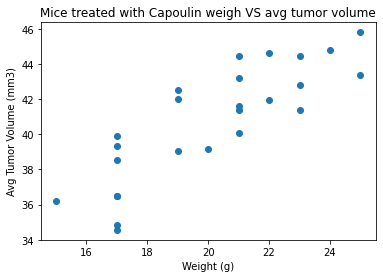

In [135]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_cap = dataset_df.loc[dataset_df["Drug Regimen"]== "Capomulin"]
mice_cap_tv_mean = mice_cap.groupby(["Mouse ID"]).mean()
mice_cap_tv_mean.head()
plt.scatter(mice_cap_tv_mean["Weight (g)"], mice_cap_tv_mean["Tumor Volume (mm3)"])
plt.title("Mice treated with Capoulin weigh VS avg tumor volume")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()




## Correlation and Regression

In [146]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as st

linear_model =st.linregress(mice_cap_tv_mean["Weight (g)"], 
                            mice_cap_tv_mean["Tumor Volume (mm3)"])
linear_model

linear_slope = 0.9544396890241045 
linear_intercept = 21.552160532685015


y_values = mice_cap_tv_mean['Weight (g)']*linear_slope+linear_intercept
plt.scatter(mice_cap_tv_mean['Weight (g)'],mice_cap_tv_mean['Tumor Volume (mm3)'])

plt.plot(mice_cap_tv_mean['Weight (g)'],y_values,color="green")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('Mice treated with Capoulin weigh VS avg tumor volumen')

plt.show()

ModuleNotFoundError: No module named 'scipy'